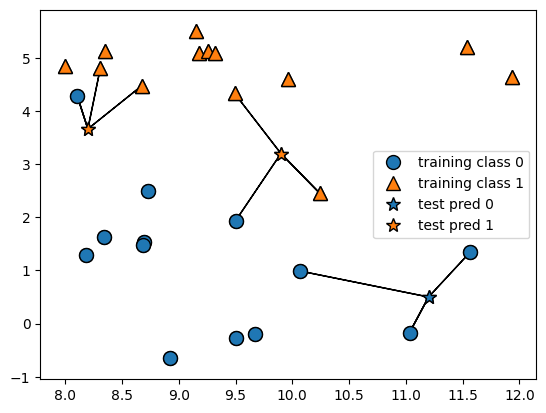

In [ ]:
import mglearn

X,y = mglearn.datasets.make_forge()
mglearn.plots.plot_knn_classification(n_neighbors=1)

# displays predictions made by the three-nearest-neighbors model on the forge dataset
mglearn.plots.plot_knn_classification(n_neighbors=3)

Now, we will apply the knn algorithm using scikit-learn. First, we split our data into a training and test set so we can evaluate generalization performance. Next, we instantiate a class. Then, we fit the classifier using the training set. For KNeighborsClassifier this means storing the dataset, so we can compute neighbors during prediction. We will then call the predict method to predict future data then the score method to evalualte how well our model does on new data.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print('Test set predictions: {}'.format(clf.predict(X_test)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test,y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


Analyzing KNeighborsClassifier
For two-dimensional datasets, we can also illustrate the prediction for all possible test points in teh xy-plane. We color the plane according to the class that would be assigned to a point in this region. This lets us view the decision boundary, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1. The below code produces the visualizations of the decision boundaries for one, three, and nine neighbors.

You will see on the left in the produced figure, using a single neighbor results in a decision boundary that follows the trianing data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boudnary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity.

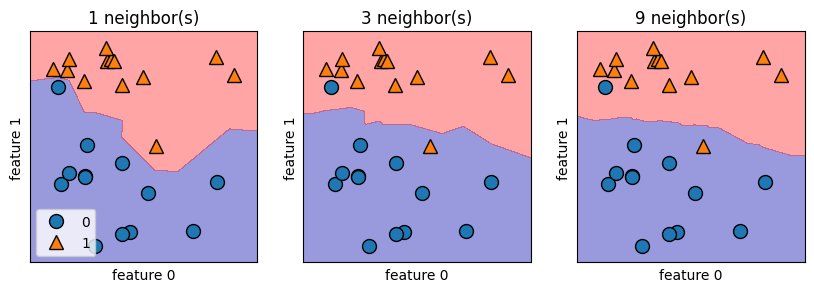

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

Now, we will confirm the connection between model complexity and generalization. We will do this with real-word breast cancer data. We'll first split the data into real data and test data and evaluate the training and test set performance with different numbers of neighbors.

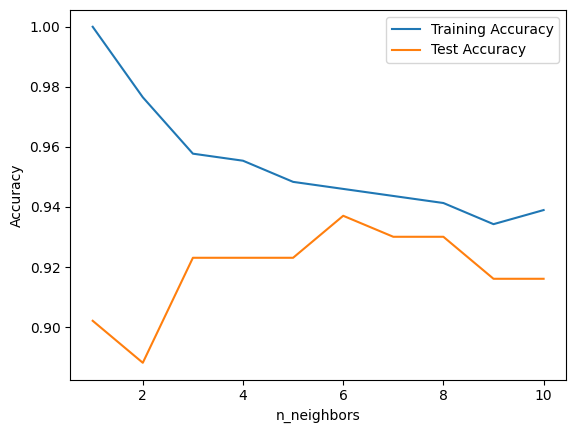

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('n_neighbors')
plt.legend()

K-neighbors regression
There is also a regression variant of the k-nearest neighbors algorithm. The k-nearest neighbors algorithm for regression is implemented in the KNeighborsRegression class in scikit-learn. When we evaluate the score of the model, regressors return the R^2 score, also known as the coefficient of determination, which is a measure of goodness of a prediction for a regression model. This yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses.

In [6]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print('Test set R^2: {:.2f}'.format(reg.score(X_test,y_test)))

Test set R^2: 0.83


Analyzing KNeighborsRegressor
For our one-dimensional dataset, we can see what the predictions look like for all possible feature values. To do this, we create a test dataset consisting of many points on the line:

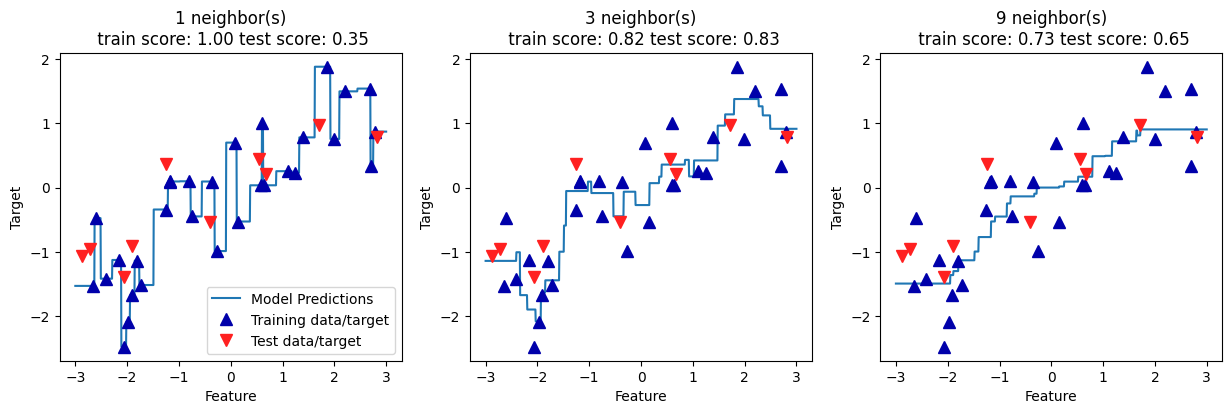

In [8]:
import numpy as np
fig, axes = plt.subplots(1,3,figsize=(15,4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    # make predictions using 1,3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train, '^',c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1), markersize=8)

    ax.set_title('{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model Predictions', 'Training data/target', 'Test data/target'], loc='best')